In [122]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report



In [145]:
datapath = './college-data.csv'
df_orig = pandas.read_csv(datapath)
# Here we removed redundant data and the labels
df_orig = df_orig.drop(['Unnamed: 0', 'Terminal', 'Top25perc'],axis=1) 
df_orig

,Private,Apps,Accept,Enroll,Top10perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,2885,537,7440,3300,450,2200,70,18.1,12,7041,60
1,Yes,2186,1924,512,16,2683,1227,12280,6450,750,1500,29,12.2,16,10527,56
2,Yes,1428,1097,336,22,1036,99,11250,3750,400,1165,53,12.9,30,8735,54
3,Yes,417,349,137,60,510,63,12960,5450,450,875,92,7.7,37,19016,59
4,Yes,193,146,55,16,249,869,7560,4120,800,1500,76,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,3089,2029,6797,3900,500,1200,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,2849,1107,11520,4960,600,1250,73,13.3,31,9189,83
774,Yes,2097,1915,695,34,2793,166,6900,4200,617,781,67,14.4,20,8323,49
775,Yes,10705,2453,1317,95,5217,83,19840,6510,630,2115,96,5.8,49,40386,99


/home/gbrls/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


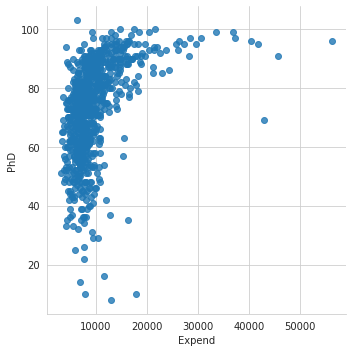

In [135]:
sns.set_style('whitegrid')
sns.lmplot('Expend', 'PhD', data=df_orig, fit_reg=False, aspect=1, palette='coolwarm')

/home/gbrls/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


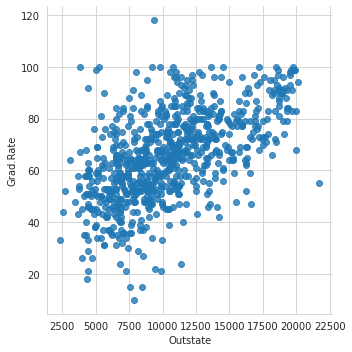

In [136]:
sns.set_style('whitegrid')
sns.lmplot('Outstate', 'Grad.Rate', data=df_orig, fit_reg=False, aspect=1, palette='coolwarm')

/home/gbrls/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


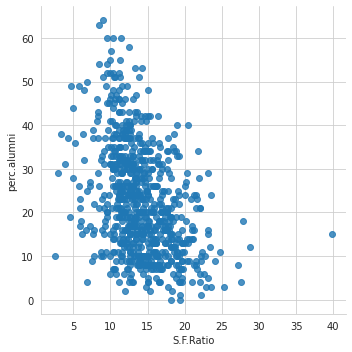

In [138]:

sns.lmplot('S.F.Ratio', 'perc.alumni', data=df_orig, fit_reg=False, aspect=1, palette='coolwarm')

In [140]:
df = df_orig.drop(['Private'], axis=1)
km = KMeans(n_clusters=5)
km.fit(df)

labels = km.labels_
df['label'] = labels

/home/gbrls/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


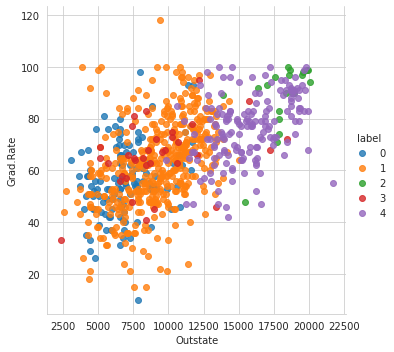

In [141]:

sns.lmplot('Outstate', 'Grad.Rate', data=df, fit_reg=False, aspect=1, hue='label')

/home/gbrls/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


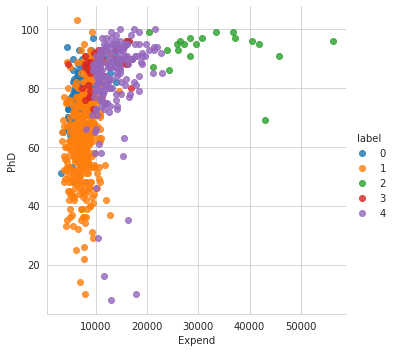

In [142]:

sns.lmplot('Expend', 'PhD', data=df, fit_reg=False, aspect=1, hue='label')

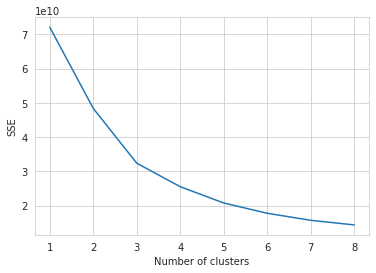

In [147]:

sse = {}
for k in range(1, 9):

    km = KMeans(n_clusters=k)
    test = km.fit(df)

    sse[k] = km.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Here we can see that 3 clusters are fine.  
After the 4th iteration we have diminishing returns.